In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=4fa3d1365532cc80ce8b659bd3d1b522ea665f4c236afbe948734a1670c6eb4c
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
pip install findspark

In [ ]:
from pyspark.sql import SparkSession # SparkSession is the entry point for using Spark's DataFrame and SQL functionalities.
from pyspark.sql.functions import col #Is the entry point for using Spark's DataFrame and SQL functionalities.
from pyspark import SparkContext as sc
import findspark
findspark.init()  #This code is used to automatically set up the necessary environment variables for Spark.
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler,StringIndexer
from pyspark.ml.evaluation import RegressionEvaluator
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark_dist_explore import hist
import numpy as np


In [ ]:
spark = SparkSession.builder.master("local").appName("Player").config("sprak.some.option","some-value").getOrCreate()

In [ ]:
df = spark.read.option('header','true').option('inferSchema','true').option('delimiter',';').csv('/content/2021-2022 NBA Player Stats - Playoffs.csv')

In [ ]:
print(df.columns)

['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [ ]:
num_rows = df.count()
num_columns = len(df.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 217
Number of columns: 30


In [ ]:
df.show(5)

+---+--------------------+---+---+---+---+---+----+---+---+-----+---+---+-----+---+---+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+
| Rk|              Player|Pos|Age| Tm|  G| GS|  MP| FG|FGA|  FG%| 3P|3PA|  3P%| 2P|2PA|  2P%| eFG%| FT|FTA|  FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF| PTS|
+---+--------------------+---+---+---+---+---+----+---+---+-----+---+---+-----+---+---+-----+-----+---+---+-----+---+---+---+---+---+---+---+---+----+
|  1|    Precious Achiuwa|  C| 22|TOR|  6|  1|27.8|4.2|8.7|0.481|0.8|2.7|0.313|3.3|6.0|0.556|0.529|1.0|1.7|  0.6|1.3|3.5|4.8|1.0|0.2|0.8|1.5|2.3|10.2|
|  2|        Steven Adams|  C| 28|MEM|  7|  5|16.3|1.3|3.0|0.429|0.0|0.0|  0.0|1.3|3.0|0.429|0.429|0.9|1.6|0.545|2.1|4.3|6.4|2.1|0.1|0.1|0.6|1.7| 3.4|
|  3|         Bam Adebayo|  C| 24|MIA| 18| 18|34.1|5.8|9.7|0.594|0.0|0.1|  0.0|5.8|9.7|0.598|0.594|3.2|4.2|0.763|2.1|5.9|8.0|2.7|1.0|0.7|2.1|3.1|14.8|
|  4|Nickeil Alexander...| SG| 23|UTA|  1|  0| 5.0|2.0|2.0|  1.0|0.0|0.0|  0.0|2.0|2.0|  1.0| 

In [ ]:
df.printSchema()

root
 |-- Rk: integer (nullable = true)
 |-- Player: string (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tm: string (nullable = true)
 |-- G: integer (nullable = true)
 |-- GS: integer (nullable = true)
 |-- MP: double (nullable = true)
 |-- FG: double (nullable = true)
 |-- FGA: double (nullable = true)
 |-- FG%: double (nullable = true)
 |-- 3P: double (nullable = true)
 |-- 3PA: double (nullable = true)
 |-- 3P%: double (nullable = true)
 |-- 2P: double (nullable = true)
 |-- 2PA: double (nullable = true)
 |-- 2P%: double (nullable = true)
 |-- eFG%: double (nullable = true)
 |-- FT: double (nullable = true)
 |-- FTA: double (nullable = true)
 |-- FT%: double (nullable = true)
 |-- ORB: double (nullable = true)
 |-- DRB: double (nullable = true)
 |-- TRB: double (nullable = true)
 |-- AST: double (nullable = true)
 |-- STL: double (nullable = true)
 |-- BLK: double (nullable = true)
 |-- TOV: double (nullable = true)
 |-- PF: double (

In [ ]:
df.dtypes

[('Rk', 'int'),
 ('Player', 'string'),
 ('Pos', 'string'),
 ('Age', 'int'),
 ('Tm', 'string'),
 ('G', 'int'),
 ('GS', 'int'),
 ('MP', 'double'),
 ('FG', 'double'),
 ('FGA', 'double'),
 ('FG%', 'double'),
 ('3P', 'double'),
 ('3PA', 'double'),
 ('3P%', 'double'),
 ('2P', 'double'),
 ('2PA', 'double'),
 ('2P%', 'double'),
 ('eFG%', 'double'),
 ('FT', 'double'),
 ('FTA', 'double'),
 ('FT%', 'double'),
 ('ORB', 'double'),
 ('DRB', 'double'),
 ('TRB', 'double'),
 ('AST', 'double'),
 ('STL', 'double'),
 ('BLK', 'double'),
 ('TOV', 'double'),
 ('PF', 'double'),
 ('PTS', 'double')]

In [ ]:
data_types = df.dtypes
for column_name, data_type in data_types:
    print(f"Column: {column_name}, Data Type: {data_type}")

Column: Rk, Data Type: int
Column: Player, Data Type: string
Column: Pos, Data Type: string
Column: Age, Data Type: int
Column: Tm, Data Type: string
Column: G, Data Type: int
Column: GS, Data Type: int
Column: MP, Data Type: double
Column: FG, Data Type: double
Column: FGA, Data Type: double
Column: FG%, Data Type: double
Column: 3P, Data Type: double
Column: 3PA, Data Type: double
Column: 3P%, Data Type: double
Column: 2P, Data Type: double
Column: 2PA, Data Type: double
Column: 2P%, Data Type: double
Column: eFG%, Data Type: double
Column: FT, Data Type: double
Column: FTA, Data Type: double
Column: FT%, Data Type: double
Column: ORB, Data Type: double
Column: DRB, Data Type: double
Column: TRB, Data Type: double
Column: AST, Data Type: double
Column: STL, Data Type: double
Column: BLK, Data Type: double
Column: TOV, Data Type: double
Column: PF, Data Type: double
Column: PTS, Data Type: double


In [ ]:
descriptive_stats = df.describe()
descriptive_stats.show()

+-------+-----------------+---------------+----+------------------+----+-----------------+-----------------+------------------+------------------+-----------------+-------------------+------------------+-----------------+-------------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|               Rk|         Player| Pos|               Age|  Tm|                G|               GS|                MP|                FG|              FGA|                FG%|                3P|              3PA|                3P%|               2P|              2PA|               2P%|               eFG%|                FT|               FTA|               FT%|               ORB|               DRB|               TRB|               AST|       

In [ ]:
len(descriptive_stats.columns)

31

In [ ]:
missing_values = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_values.show()

+---+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+
| Rk|Player|Pos|Age| Tm|  G| GS| MP| FG|FGA|FG%| 3P|3PA|3P%| 2P|2PA|2P%|eFG%| FT|FTA|FT%|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|
+---+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+
|  0|     0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
+---+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+---+



In [ ]:
for column_name in df.columns:
    unique_values = df.select(col(column_name)).distinct()
    print(f"Unique values in column '{column_name}':")
    unique_values.show()

Unique values in column 'Rk':
+---+
| Rk|
+---+
|148|
| 31|
| 85|
|137|
| 65|
| 53|
|133|
| 78|
|108|
|155|
| 34|
|193|
|211|
|101|
|115|
|126|
| 81|
| 28|
|183|
|210|
+---+
only showing top 20 rows

Unique values in column 'Player':
+--------------------+
|              Player|
+--------------------+
|      Brandon Ingram|
|      Svi Mykhailiuk|
|         Zach LaVine|
|Timoth� Luwawu-Ca...|
|       Javonte Green|
|           Ja Morant|
|          Seth Curry|
| Dorian Finney-Smith|
|       Armoni Brooks|
|         Brook Lopez|
|      Jaden Springer|
|     Pat Connaughton|
|          Khem Birch|
|       Cameron Payne|
|         Serge Ibaka|
|   Derrick Jones Jr.|
|       Deandre Ayton|
|    Patrick Beverley|
|         Bruce Brown|
|     Bismack Biyombo|
+--------------------+
only showing top 20 rows

Unique values in column 'Pos':
+---+
|Pos|
+---+
| PF|
| PG|
| SF|
|  C|
| SG|
+---+

Unique values in column 'Age':
+---+
|Age|
+---+
| 31|
| 34|
| 28|
| 26|
| 27|
| 22|
| 20|
| 19|
| 35|

In [ ]:
def contains_special_characters(column):
    return col(column).rlike("[^a-zA-Z0-9\s.]")

for column_name in df.columns:
    has_special_characters = df.select(column_name).where(contains_special_characters(column_name))

    if has_special_characters.count() > 0:
        print(f"Column '{column_name}' contains special characters:")
        has_special_characters.show()
    else:
        print(f"Column '{column_name}' does not contain special characters.")

Column 'Rk' does not contain special characters.
Column 'Player' contains special characters:
+--------------------+
|              Player|
+--------------------+
|Nickeil Alexander...|
|       D?vis Bert?ns|
|   Bogdan Bogdanovi?|
|    Bojan Bogdanovi?|
|       Vlatko ?an?ar|
|         Luka Don?i?|
|        Goran Dragi?|
| Dorian Finney-Smith|
|     Devonte' Graham|
| Juancho Hernang�mez|
|   Willy Hernang�mez|
|     De'Andre Hunter|
|        Nikola Joki?|
|Timoth� Luwawu-Ca...|
|    Boban Marjanovi?|
|   De'Anthony Melton|
|       Royce O'Neale|
|    D'Angelo Russell|
|      Day'Ron Sharpe|
|Juan Toscano-Ande...|
+--------------------+
only showing top 20 rows

Column 'Pos' does not contain special characters.
Column 'Age' does not contain special characters.
Column 'Tm' does not contain special characters.
Column 'G' does not contain special characters.
Column 'GS' does not contain special characters.
Column 'MP' does not contain special characters.
Column 'FG' does not contain spec

In [ ]:
def remove_special_characters(column):
    # Regular expression pattern to match non-alphanumeric characters and whitespace
    return regexp_replace(col(column), '[^a-zA-Z0-9\s]', '')

# Apply the remove_special_characters function to the "Player" column
cleaned_df = df.withColumn("Player", remove_special_characters("Player"))

# Show the cleaned DataFrame
cleaned_df.show()

+---+--------------------+---+---+---+---+---+----+----+----+-----+---+---+-----+----+----+-----+-----+---+----+-----+---+----+----+---+---+---+---+---+----+
| Rk|              Player|Pos|Age| Tm|  G| GS|  MP|  FG| FGA|  FG%| 3P|3PA|  3P%|  2P| 2PA|  2P%| eFG%| FT| FTA|  FT%|ORB| DRB| TRB|AST|STL|BLK|TOV| PF| PTS|
+---+--------------------+---+---+---+---+---+----+----+----+-----+---+---+-----+----+----+-----+-----+---+----+-----+---+----+----+---+---+---+---+---+----+
|  1|    Precious Achiuwa|  C| 22|TOR|  6|  1|27.8| 4.2| 8.7|0.481|0.8|2.7|0.313| 3.3| 6.0|0.556|0.529|1.0| 1.7|  0.6|1.3| 3.5| 4.8|1.0|0.2|0.8|1.5|2.3|10.2|
|  2|        Steven Adams|  C| 28|MEM|  7|  5|16.3| 1.3| 3.0|0.429|0.0|0.0|  0.0| 1.3| 3.0|0.429|0.429|0.9| 1.6|0.545|2.1| 4.3| 6.4|2.1|0.1|0.1|0.6|1.7| 3.4|
|  3|         Bam Adebayo|  C| 24|MIA| 18| 18|34.1| 5.8| 9.7|0.594|0.0|0.1|  0.0| 5.8| 9.7|0.598|0.594|3.2| 4.2|0.763|2.1| 5.9| 8.0|2.7|1.0|0.7|2.1|3.1|14.8|
|  4|Nickeil Alexander...| SG| 23|UTA|  1|  0| 5.0| 

In [ ]:
pip install pyspark_dist_explore

Exception ignored in: <function JavaWrapper.__del__ at 0x7b2cb55048b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyspark/ml/wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'VectorAssembler' object has no attribute '_java_obj'


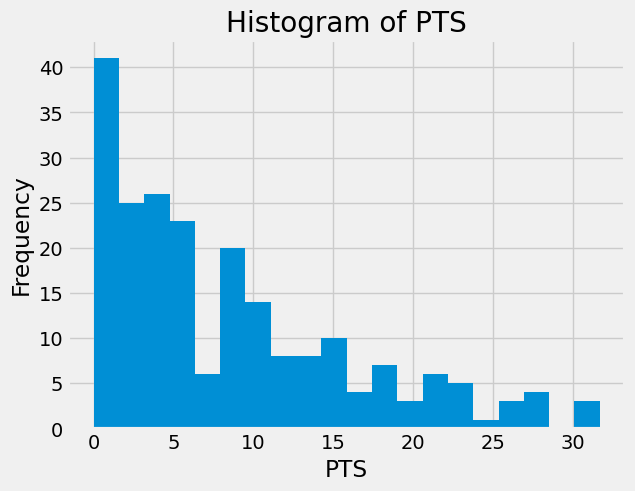

In [ ]:
column_name = "PTS"
column_data = df.select(column_name)

# Convert the selected column to a list of values
values_list = [row[column_name] for row in column_data.collect()]

# Use Matplotlib to plot a histogram
plt.hist(values_list, bins=20)
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.title("Histogram of " + column_name)
plt.show()

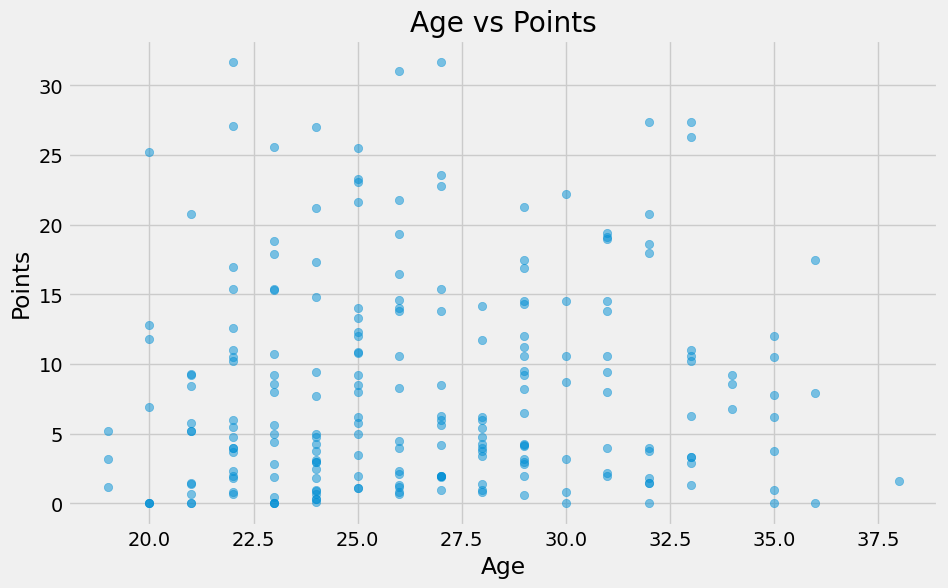

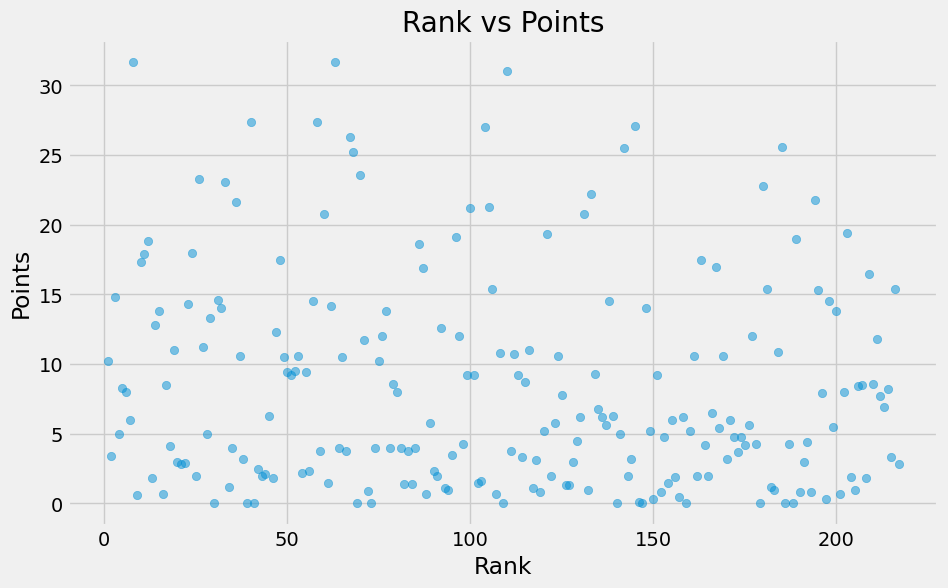

In [ ]:
selected_df = df.select("Age", "PTS", "Rk")

# Convert to Pandas DataFrame for visualization
pandas_df = selected_df.toPandas()

# Plot age vs points
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df["Age"], pandas_df["PTS"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Points")
plt.title("Age vs Points")
plt.grid(True)
plt.show()

# Plot rank vs points
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df["Rk"], pandas_df["PTS"], alpha=0.5)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Rank vs Points")
plt.grid(True)
plt.show()


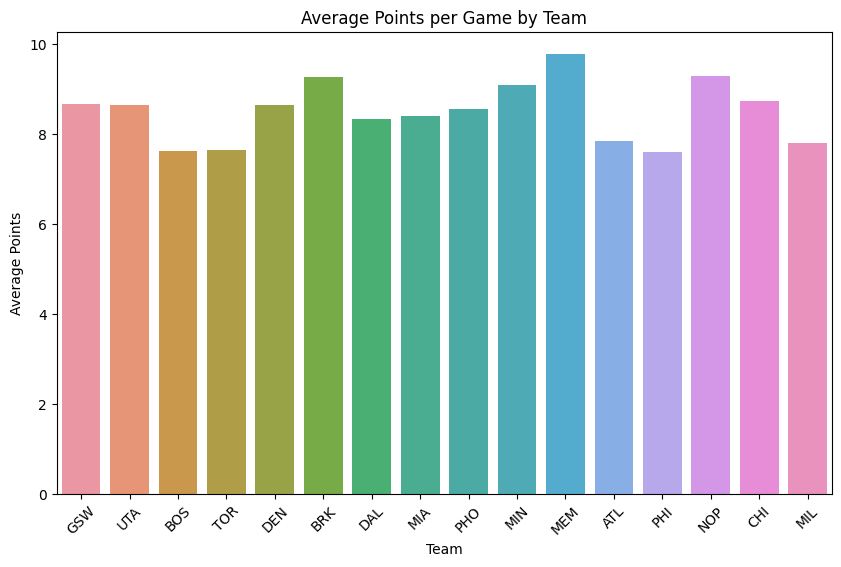

In [ ]:
# Calculate average points per game by team
team_avg_points = cleaned_df.groupBy("Tm").avg("PTS")
# Convert the team_avg_points Spark DataFrame to Pandas DataFrame
team_avg_points_pd = team_avg_points.toPandas()
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Tm", y="avg(PTS)", data=team_avg_points_pd)
plt.xlabel("Team")
plt.ylabel("Average Points")
plt.title("Average Points per Game by Team")
plt.xticks(rotation=45)
plt.show()


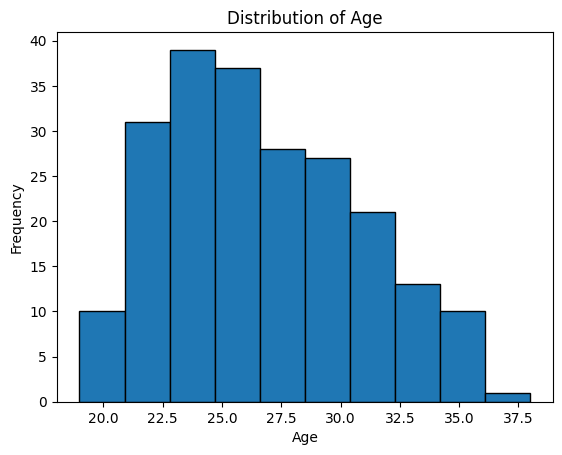

In [ ]:
# Create a histogram of Age column using Matplotlib
plt.hist(df.select("Age").rdd.flatMap(lambda x: x).collect(), bins=10, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

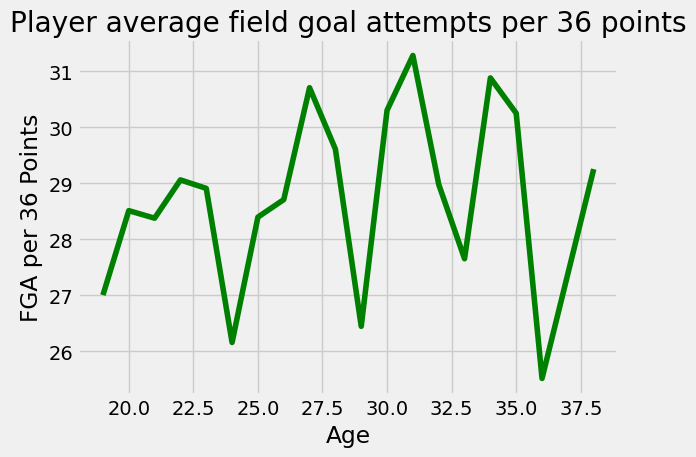

In [ ]:
# Calculate average field goal attempts and points per game by age
fga_pts_avg = df.groupBy("Age").agg({'FGA': 'sum', 'PTS': 'sum'}).select(col('Age'),
                                                                         (36 * col('sum(FGA)') / col('sum(PTS)')).alias('fga_p36pts')).orderBy('Age')

# Create a line plot using seaborn
plt.style.use('fivethirtyeight')

# Convert the Spark DataFrame to Pandas DataFrame for visualization
_df = fga_pts_avg.toPandas()

plt.plot(_df.Age, _df.fga_p36pts,color="green")
plt.xlabel("Age")
plt.ylabel("FGA per 36 Points")
plt.title('Player average field goal attempts per 36 points')

# Annotate important events
plt.annotate('3 point introduced', xy=(23, 1.5), xytext=(19, 1.9), fontsize=9,
             arrowprops=dict(facecolor="grey", shrink=0, linewidth=2))
plt.annotate("NBA moved in 3-point line", xy=(30, 1.3), xytext=(25, 1.7), fontsize=9,
             arrowprops=dict(facecolor="grey", shrink=0, linewidth=2))
plt.annotate("NBA moved back in 3-point line", xy=(32, 1.1), xytext=(32.5, 1.5), fontsize=9,
             arrowprops=dict(facecolor="grey", shrink=0, linewidth=2))

plt.tight_layout()
plt.show()

In [ ]:
df.orderBy('PTS',ascending=False).show(10)

+---+--------------------+---+---+---+---+---+----+----+----+-----+---+----+-----+----+----+-----+-----+---+----+-----+---+----+----+---+---+---+---+---+----+
| Rk|              Player|Pos|Age| Tm|  G| GS|  MP|  FG| FGA|  FG%| 3P| 3PA|  3P%|  2P| 2PA|  2P%| eFG%| FT| FTA|  FT%|ORB| DRB| TRB|AST|STL|BLK|TOV| PF| PTS|
+---+--------------------+---+---+---+---+---+----+----+----+-----+---+----+-----+----+----+-----+-----+---+----+-----+---+----+----+---+---+---+---+---+----+
|  8|Giannis Antetokou...| PF| 27|MIL| 12| 12|37.3|11.7|23.8|0.491|0.8| 3.4| 0.22|10.9|20.3|0.537|0.507|7.6|11.2|0.679|2.2|12.0|14.2|6.8|0.7|1.3|4.5|3.6|31.7|
| 63|         Luka Don?i?| PG| 22|DAL| 15| 15|36.8|10.7|23.5|0.455|3.4| 9.9|0.345| 7.3|13.6|0.534|0.527|6.9| 9.0| 0.77|0.7| 9.1| 9.8|6.4|1.8|0.6|3.9|2.9|31.7|
|110|        Nikola Joki?|  C| 26|DEN|  5|  5|34.2|12.2|21.2|0.575|1.0| 3.6|0.278|11.2|17.6|0.636|0.599|5.6| 6.6|0.848|3.4| 9.8|13.2|5.8|1.6|1.0|4.8|4.0|31.0|
| 40|        Jimmy Butler| SF| 32|MIA| 17| 17|

In [ ]:
# Data preprocessing
# For categorical columns (Pos, Tm), use StringIndexer to convert them to numerical

indexer_pos = StringIndexer(inputCol="Pos", outputCol="PosIndex")
indexer_tm = StringIndexer(inputCol="Tm", outputCol="TmIndex")
df_indexed = indexer_pos.fit(df).transform(indexer_tm.fit(df).transform(df))

# Assemble features using VectorAssembler
feature_columns = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','FT','FTA']
assembler = VectorAssembler(inputCols=feature_columns + ['PosIndex', 'TmIndex'], outputCol='features')
df_assembled = assembler.transform(df_indexed)

In [ ]:
# Split data into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Create a LinearRegression model
lr = LinearRegression(featuresCol='features', labelCol='PTS')

# Train the model
lr_model = lr.fit(train_data)

# Make predictions on test data
predictions = lr_model.transform(test_data)

In [ ]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol="PTS", predictionCol="prediction", metricName="rmse")
evaluator2 = RegressionEvaluator(labelCol="PTS", predictionCol="prediction", metricName="r2")
r2 = evaluator2.evaluate(predictions)
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)
print("R squared:", r2)

Root Mean Squared Error (RMSE): 0.060244251662820034
R squared: 0.9999356963323817


In [ ]:
predictions_all = lr_model.transform(df_assembled)

# Select columns for actual and predicted values
actual_pred_df = predictions_all.select("PTS", "prediction")

# Display the DataFrame with actual and predicted values
actual_pred_df.show()


+----+------------------+
| PTS|        prediction|
+----+------------------+
|10.2|10.164509964314933|
| 3.4|3.5010213125851894|
|14.8| 14.75720256680946|
| 5.0| 4.997618717951366|
| 8.3| 8.389727413352679|
| 8.0|  8.07844983278098|
| 6.0| 5.993413606287034|
|31.7| 31.74237856179652|
| 0.6| 0.690514205888781|
|17.3|17.282524942538284|
|17.9| 17.94674017568824|
|18.8|  18.6932286925217|
| 1.8|1.8067552285592143|
|12.8|12.786371456196122|
|13.8|13.780098615611323|
| 0.7| 0.605147589808646|
| 8.5| 8.484283647668688|
| 4.1| 4.118707411075506|
|11.0|10.962356278918527|
| 3.0| 2.884413103812622|
+----+------------------+
only showing top 20 rows

